In [ ]:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "project",\r\n  "key": "KGAT_099e98bd3a3e47ec535571ae54f30d1c"\r\n}\r\n'}

In [ ]:
!pip install kaggle librosa numpy matplotlib tensorflow tqdm scikit-learn


In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

print("Kaggle API configured successfully")


Kaggle API configured successfully


In [ ]:
!kaggle datasets list | head


ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
wardabilal/spotify-global-music-dataset-20092025                 Spotify Global Music Dataset (2009–2025)               1289021  2025-11-11 09:43:05.933000          16387        421  1.0              
neurocipher/heartdisease                                         Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114         76  1.0              
kundanbedmutha/exam-score-prediction-dataset                     Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        145  1.0          

In [ ]:
!kaggle datasets download -d abdulvahap/music-instrunment-sounds-for-classification


Dataset URL: https://www.kaggle.com/datasets/abdulvahap/music-instrunment-sounds-for-classification
License(s): apache-2.0
music-instrunment-sounds-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p /content/drive/MyDrive/InstruNetAI


In [ ]:
!mv music-instrunment-sounds-for-classification.zip /content/drive/MyDrive/InstruNetAI/


In [ ]:
!ls /content/drive/MyDrive/InstruNetAI


music-instrunment-sounds-for-classification.zip


In [ ]:
!unzip /content/drive/MyDrive/InstruNetAI/music-instrunment-sounds-for-classification.zip \
-d /content/drive/MyDrive/InstruNetAI/dataset


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/53.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/530.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/531.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/532.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/533.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/534.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/535.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/536.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/537.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/538.wav  
  inflating: /content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Violin/539

In [ ]:
!ls /content/drive/MyDrive/InstruNetAI/dataset


music_dataset


In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/InstruNetAI/dataset"

SAMPLE_RATE = 22050
N_MELS = 128
FIXED_LENGTH = 128   # time dimension for CNN



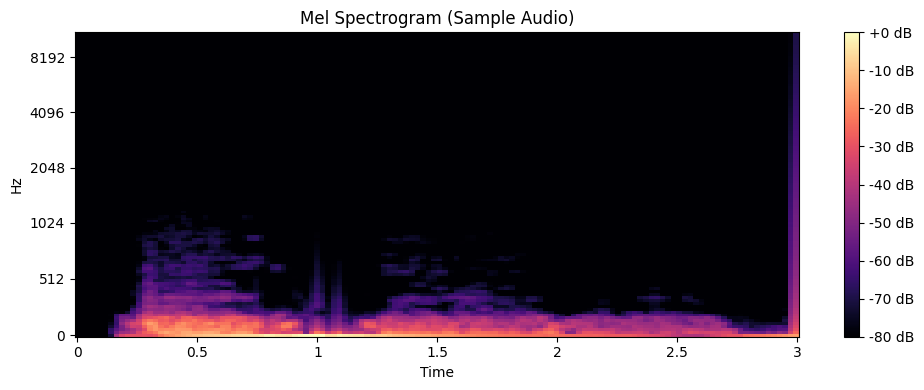

In [ ]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"

audio_file = os.listdir(AUDIO_PATH)[0]
audio_path = os.path.join(AUDIO_PATH, audio_file)

audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

mel = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=N_MELS
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


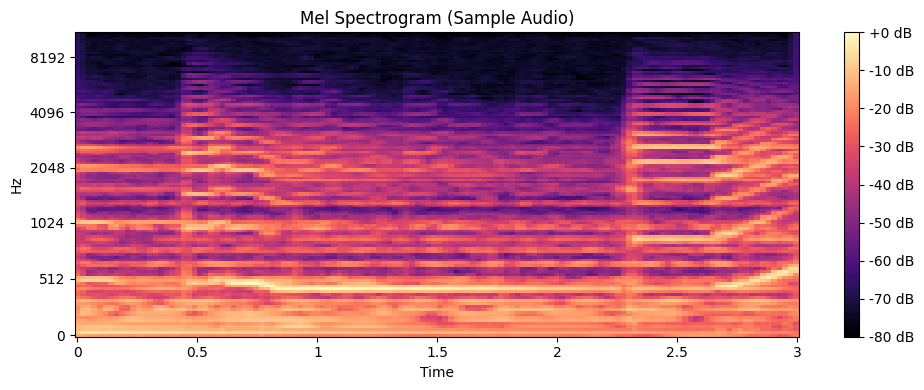

In [ ]:
AUDIO_PATH = "/content/drive/MyDrive/InstruNetAI/dataset/music_dataset/Electro_Guitar"

audio_file = os.listdir(AUDIO_PATH)[1]
audio_path = os.path.join(AUDIO_PATH, audio_file)

audio, sr = librosa.load(audio_path, sr=SAMPLE_RATE)

mel = librosa.feature.melspectrogram(
    y=audio,
    sr=sr,
    n_mels=N_MELS
)

mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10,4))
librosa.display.specshow(
    mel_db,
    sr=sr,
    x_axis='time',
    y_axis='mel'
)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(features)
X = X[..., np.newaxis]   # CNN expects 4D input

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y = to_categorical(y_encoded)


In [ ]:
np.save("/content/drive/MyDrive/InstruNetAI/X.npy", X)
np.save("/content/drive/MyDrive/InstruNetAI/y.npy", y)
np.save("/content/drive/MyDrive/InstruNetAI/labels.npy", label_encoder.classes_)

print("Saved files:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Classes:", label_encoder.classes_)


Saved files:
X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Classes: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']


**Milestone2**

Day1

1.verify the dataset structure

2.decide image size

3.decide batch size

4.create image data loader

5.load training data

6 load validation data

7.check the class mapping

8.inspect one batch

In [ ]:
import os

BASE_PATH = "/content/drive/MyDrive/InstruNetAI"

print(os.listdir(BASE_PATH))


['dataset', 'X.npy', 'y.npy', 'labels.npy', 'instrunet_cnn_model.h5', 'spectrograms']


In [ ]:
import numpy as np

X = np.load("/content/drive/MyDrive/InstruNetAI/X.npy")
y = np.load("/content/drive/MyDrive/InstruNetAI/y.npy")
labels = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", labels)


X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Labels: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']


In [ ]:
IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]


In [ ]:
BATCH_SIZE = 32


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 33848
Validation samples: 8463


In [ ]:
class_mapping = {i: label for i, label in enumerate(labels)}
print(class_mapping)

print("Number of classes:", len(class_mapping))


{0: np.str_('Accordion'), 1: np.str_('Acoustic_Guitar'), 2: np.str_('Banjo'), 3: np.str_('Bass_Guitar'), 4: np.str_('Clarinet'), 5: np.str_('Cymbals'), 6: np.str_('Dobro'), 7: np.str_('Drum_set'), 8: np.str_('Electro_Guitar'), 9: np.str_('Floor_Tom'), 10: np.str_('Harmonica'), 11: np.str_('Harmonium'), 12: np.str_('Hi_Hats'), 13: np.str_('Horn'), 14: np.str_('Keyboard'), 15: np.str_('Mandolin'), 16: np.str_('Organ'), 17: np.str_('Piano'), 18: np.str_('Saxophone'), 19: np.str_('Shakers'), 20: np.str_('Tambourine'), 21: np.str_('Trombone'), 22: np.str_('Trumpet'), 23: np.str_('Ukulele'), 24: np.str_('Violin'), 25: np.str_('cowbell'), 26: np.str_('flute'), 27: np.str_('vibraphone')}
Number of classes: 28


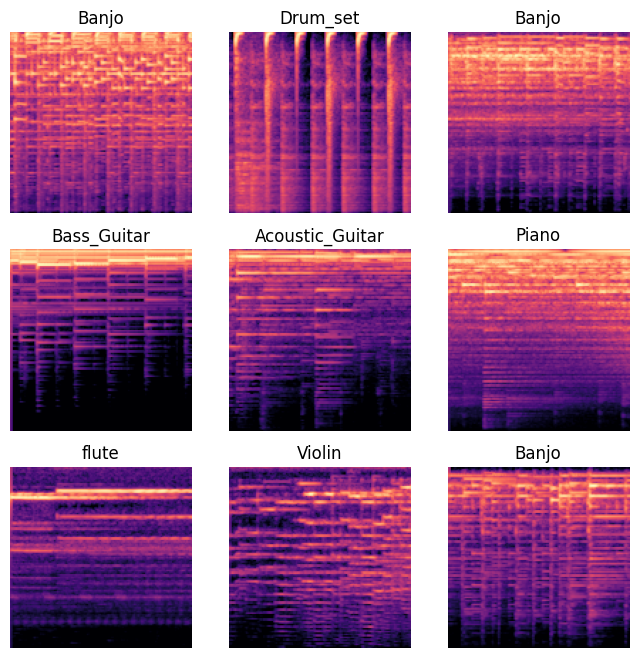

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].squeeze(), cmap='magma')
    plt.axis("off")
    label_index = np.argmax(y_train[i])
    plt.title(class_mapping[label_index])

plt.show()


**Day2**

task 1 - identify the no.of classes

task 2 - design cnn architecture

task 3- add regularization

task 4 - add fully connected layer

task 5- add output layer

task 6 - build and verify te model

In [ ]:
import numpy as np

BASE_PATH = "/content/drive/MyDrive/InstruNetAI"

X = np.load(BASE_PATH + "/X.npy")
y = np.load(BASE_PATH + "/y.npy")
labels = np.load(BASE_PATH + "/labels.npy", allow_pickle=True)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", labels)

NUM_CLASSES = len(labels)
print("Number of classes:", NUM_CLASSES)


X shape: (42311, 128, 128, 1)
y shape: (42311, 28)
Labels: ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']
Number of classes: 28


STEP 2: DECIDE IMAGE SIZE

In [ ]:
IMG_HEIGHT = X.shape[1]
IMG_WIDTH = X.shape[2]


STEP 3: DECIDE BATCH SIZE

In [ ]:
BATCH_SIZE = 32
CHANNELS = X.shape[3]
EPOCHS = 20

PART 2: TRAIN–VALIDATION SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 33848
Validation samples: 8463


CNN ARCHITECTURE

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
model = Sequential()

# Convolution Block 1
model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(IMG_HEIGHT, IMG_WIDTH, CHANNELS)))
model.add(MaxPooling2D((2,2)))

# Convolution Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Convolution Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(NUM_CLASSES, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,676 (12.62 MB)

 Trainable params: 3,307,676 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy', # Changed from sparse_categorical_crossentropy
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)


Epoch 1/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 31s 23ms/step - accuracy: 0.6855 - loss: 1.6924 - val_accuracy: 0.9386 - val_loss: 0.2074
Epoch 2/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9476 - loss: 0.1795 - val_accuracy: 0.9456 - val_loss: 0.2261
Epoch 3/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9671 - loss: 0.1434 - val_accuracy: 0.9618 - val_loss: 0.1948
Epoch 4/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9754 - loss: 0.1127 - val_accuracy: 0.9661 - val_loss: 0.2633
Epoch 5/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9789 - loss: 0.1221 - val_accuracy: 0.9686 - val_loss: 0.2697
Epoch 6/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9815 - loss: 0.1204 - val_accuracy: 0.9628 - val_loss: 0.3716
Epoch 7/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9824 - loss: 0.1182 - val_accuracy: 0.9529 - val_loss: 0.4926
Epoch 8/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9843 -

Accuracy & Validation Accuracy

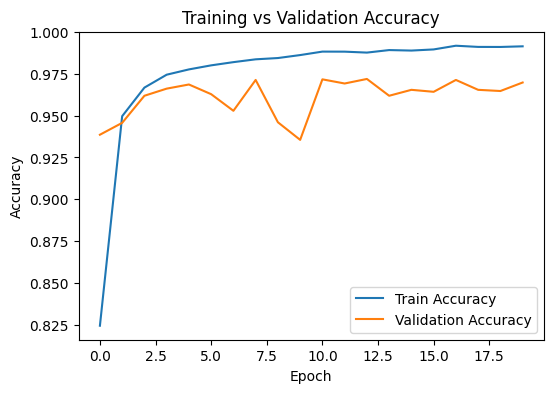

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
print(
    "Final Training Accuracy:", history.history['accuracy'][-1],
    "\nFinal Validation Accuracy:", history.history['val_accuracy'][-1]
)


Final Training Accuracy: 0.9913731813430786 
Final Validation Accuracy: 0.969750702381134


1.record final metrics

2.calculate accuracy gap

3.plot accuracy curves

4.plot loss curves

5.generate confusion matrix

6.now do class wise performance analysis

7.identify misclassified spectrograms

8.check overfitting

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]


In [ ]:
accuracy_gap = final_train_acc - final_val_acc
print("Accuracy Gap:", accuracy_gap)


Accuracy Gap: 0.02162247896194458


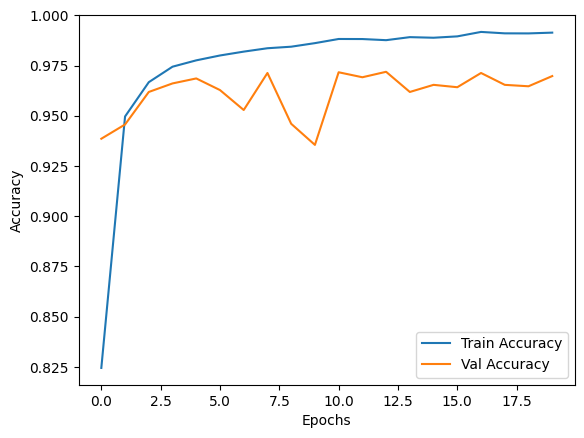

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


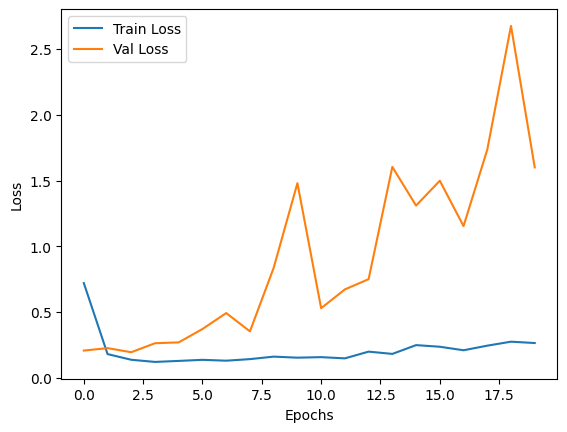

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [ ]:
# Convert one-hot to class indices
y_val_labels = np.argmax(y_val, axis=1)


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


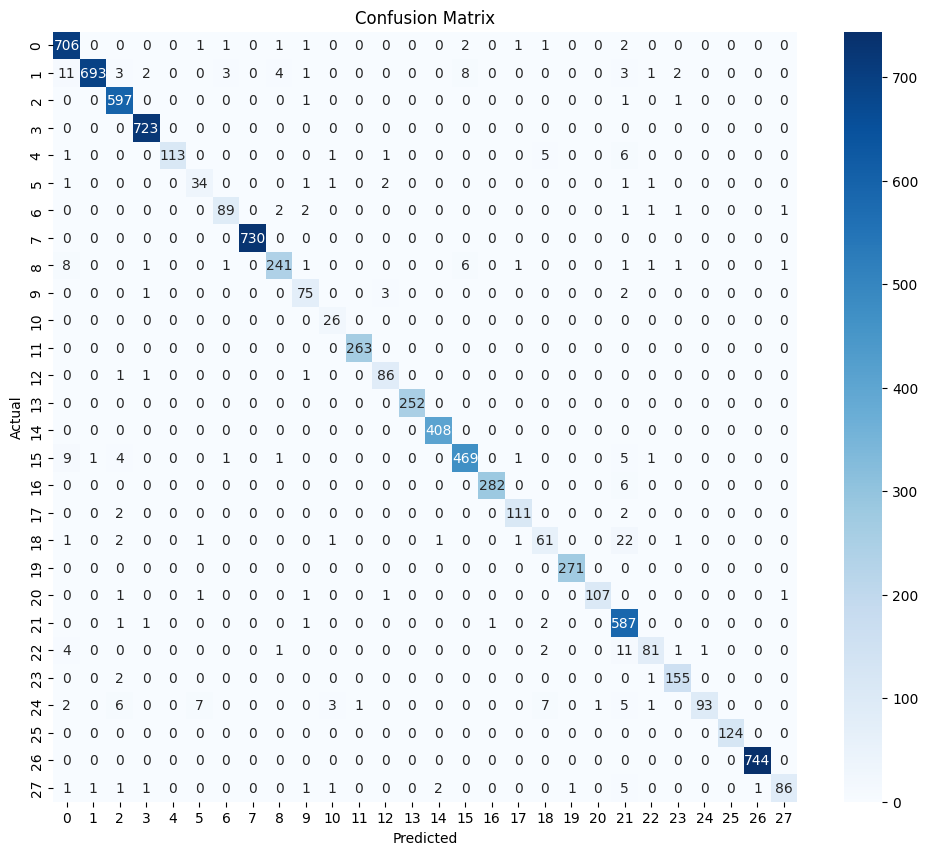

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict
y_pred = np.argmax(model.predict(X_val), axis=1)

# Convert one-hot y_val
y_val_labels = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val_labels, y_pred)

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

# Correct: load the .npy file
class_names = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

# Check the content
print(class_names)


['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']


In [ ]:
from sklearn.metrics import classification_report

# y_val_labels: true labels
# y_pred: predicted labels
print(classification_report(y_val_labels, y_pred, target_names=list(class_names)))


                 precision    recall  f1-score   support

      Accordion       0.95      0.99      0.97       716
Acoustic_Guitar       1.00      0.95      0.97       731
          Banjo       0.96      0.99      0.98       600
    Bass_Guitar       0.99      1.00      1.00       723
       Clarinet       1.00      0.89      0.94       127
        Cymbals       0.77      0.83      0.80        41
          Dobro       0.94      0.92      0.93        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.96      0.92      0.94       263
      Floor_Tom       0.87      0.93      0.90        81
      Harmonica       0.79      1.00      0.88        26
      Harmonium       1.00      1.00      1.00       263
        Hi_Hats       0.92      0.97      0.95        89
           Horn       1.00      1.00      1.00       252
       Keyboard       0.99      1.00      1.00       408
       Mandolin       0.97      0.95      0.96       492
          Organ       1.00    

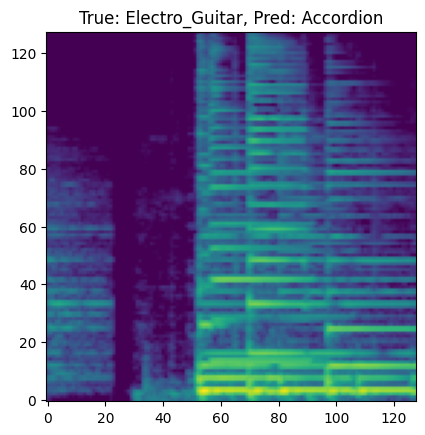

In [ ]:
mis_idx = np.where(y_val_labels != y_pred)[0]

plt.imshow(X_val[mis_idx[0]].squeeze(), origin='lower')
plt.title(f"True: {labels[y_val_labels[mis_idx[0]]]}, Pred: {labels[y_pred[mis_idx[0]]]}")
plt.show()

In [ ]:
if accuracy_gap > 0.1:
    print("⚠️ Model may be overfitting")
else:
    print("✅ Model generalizes well")


✅ Model generalizes well


Choose only one of the following strategies:

Adjust learning rate

Increase or decrease number of epochs

Modify dropout value

Improve data augmentation

Apply class balancing technique

Do not apply more than one change.

**adjusting the learning rate**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

NUM_CLASSES = len(class_names)
INPUT_SHAPE = X_train.shape[1:]  # e.g., (128,128,3)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=INPUT_SHAPE),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,676 (12.62 MB)

 Trainable params: 3,307,676 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Adjust learning rate (example: reduce to 0.0005)
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6803 - loss: 1.7362 - val_accuracy: 0.9313 - val_loss: 0.2412
Epoch 2/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9449 - loss: 0.1955 - val_accuracy: 0.9514 - val_loss: 0.1594
Epoch 3/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9708 - loss: 0.0945 - val_accuracy: 0.9558 - val_loss: 0.1398
Epoch 4/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9804 - loss: 0.0653 - val_accuracy: 0.9635 - val_loss: 0.1289
Epoch 5/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9847 - loss: 0.0478 - val_accuracy: 0.9699 - val_loss: 0.1088
Epoch 6/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9877 - loss: 0.0403 - val_accuracy: 0.9676 - val_loss: 0.1372
Epoch 7/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9562 - val_loss: 0.1732
Epoch 8/20
1058/1058 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9877 -

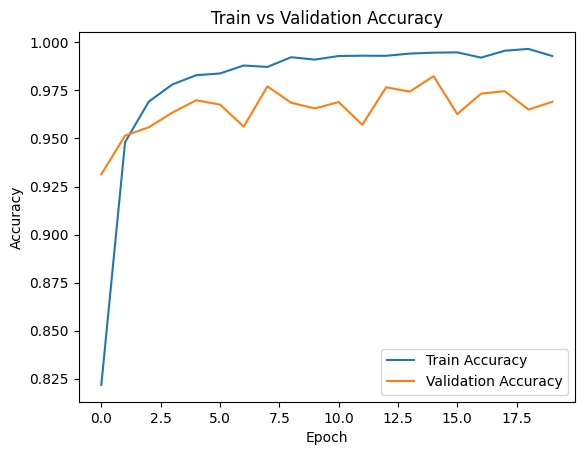

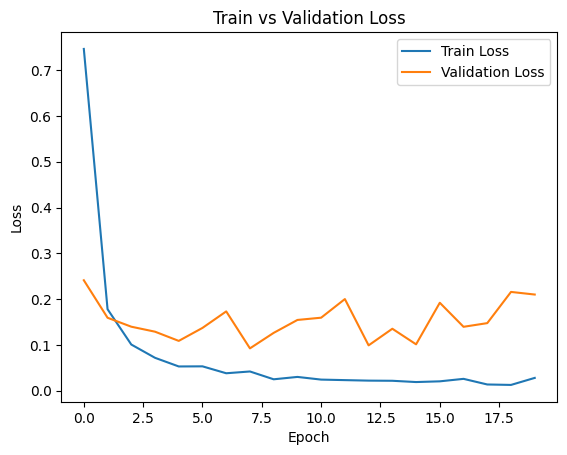

Final Training Accuracy: 0.9929
Final Validation Accuracy: 0.9690


In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()

# Print final metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


1.select best model (if you have multiples versions)

2.final evaluation on validation test

3.generate confusion matrix

4.now compute class wise metrics

5.analyze errors

6.save and record the final observation

In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9657 - loss: 0.2242
Validation Loss: 0.2100
Validation Accuracy: 0.9690


265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


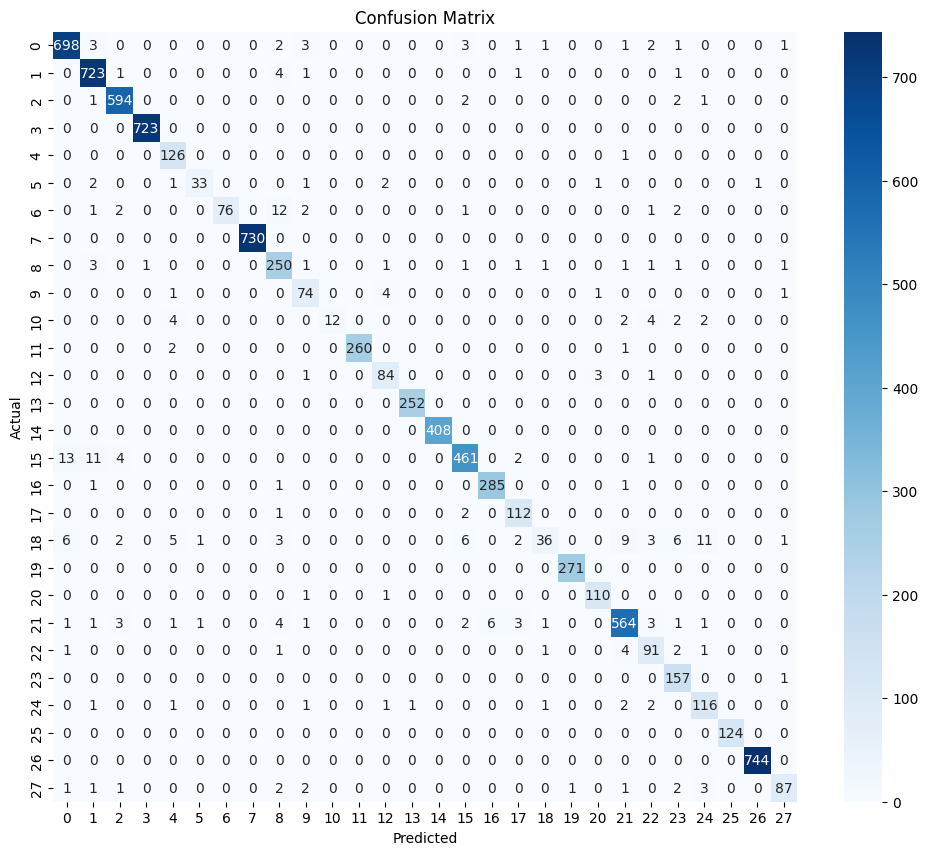

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict classes
y_pred = np.argmax(model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Load class names
class_names = np.load("/content/drive/MyDrive/InstruNetAI/labels.npy", allow_pickle=True)

report = classification_report(y_true, y_pred, target_names=list(class_names))
print(report)


                 precision    recall  f1-score   support

      Accordion       0.97      0.97      0.97       716
Acoustic_Guitar       0.97      0.99      0.98       731
          Banjo       0.98      0.99      0.98       600
    Bass_Guitar       1.00      1.00      1.00       723
       Clarinet       0.89      0.99      0.94       127
        Cymbals       0.94      0.80      0.87        41
          Dobro       1.00      0.78      0.88        97
       Drum_set       1.00      1.00      1.00       730
 Electro_Guitar       0.89      0.95      0.92       263
      Floor_Tom       0.84      0.91      0.88        81
      Harmonica       1.00      0.46      0.63        26
      Harmonium       1.00      0.99      0.99       263
        Hi_Hats       0.90      0.94      0.92        89
           Horn       1.00      1.00      1.00       252
       Keyboard       1.00      1.00      1.00       408
       Mandolin       0.96      0.94      0.95       492
          Organ       0.98    

Number of misclassified samples: 262


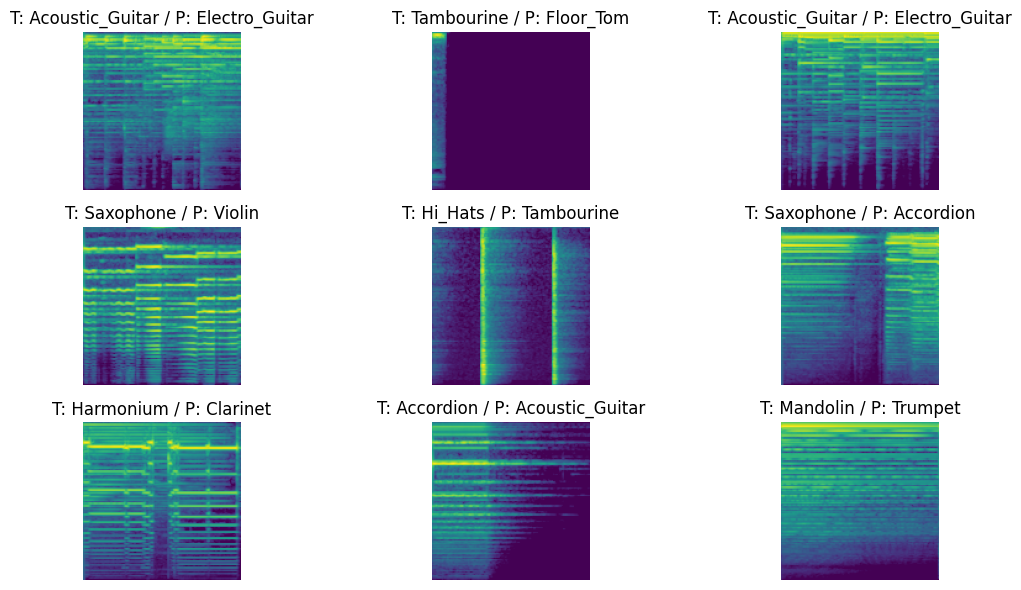

In [ ]:
# Find misclassified indices
misclassified_idx = np.where(y_true != y_pred)[0]
print(f"Number of misclassified samples: {len(misclassified_idx)}")

# Show some misclassified spectrograms
plt.figure(figsize=(12,6))
for i, idx in enumerate(misclassified_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[idx])
    true_label = class_names[y_true[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"T: {true_label} / P: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
final_observations = {
    "Validation Accuracy": float(val_accuracy),
    "Validation Loss": float(val_loss),
    "Misclassified Samples": int(len(misclassified_idx)),
    "Class-wise Report": report
}

# Save to JSON
import json
with open("/content/drive/MyDrive/InstruNetAI/final_evaluation.json", "w") as f:
    json.dump(final_observations, f, indent=4)

print("Final evaluation saved as JSON!")


Final evaluation saved as JSON!
